## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [ ]:
!wget 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'

--2020-06-10 19:49:58--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv’

bootcampers.csv     100%[===================>]   2.38M  14.6MB/s    in 0.2s    

2020-06-10 19:49:58 (14.6 MB/s) - ‘bootcampers.csv’ saved [2499384/2499384]



In [ ]:
#imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#load the data into a dataframe
df = pd.read_csv('bootcampers.csv', na_values='?')
print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
small_sample = df.sample(20, random_state=42)
large_sample = df.sample(200, random_state=42)

print(small_sample.shape)
print(large_sample.shape)

(20, 15)
(200, 15)


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [ ]:
print(small_sample['ConvertedSalary'].mean())
print(large_sample['ConvertedSalary'].mean())

55752.2
68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would consider the `large_sample` more trustworthy because it is a larger sample size.  A larger sample will always be more representative of the larger population, presuming that both samples are random.  A non-technical audience would likely not even think about the population size of the study, preventing them from being able to determine which value is more trustworthy.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Each value by itself may not provide this insight, but by comparing the point estimate between two sample sizes that differ by a magnitude of 10, the error becomes pronounced, and suggests that there is likely still some error between the `large_sample` and the larger population as a whole.  

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



We could calculate and include the confidence interval to show the range of error in relation to the dervived means.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
#Create a function to determine the confidence interval

def conf_interval(data, confidence=.95):
  #Convert the data to a np array
  sample = np.array(data)
  #Get the sample mean
  x_bar = sample.mean()
  #Get the sample std deviation
  s = np.std(sample, ddof=1)
  #Get the sample size
  n = len(sample)
  #Get the t-stat
  t = stats.t.ppf((1 + confidence) / 2, n-1)
  #Get the standard error
  std_err = s / np.sqrt(n)
  #Get the Margin of Error
  moe = std_err * t
  #Get the upper and lower bounds
  upper = x_bar + moe
  lower = x_bar - moe

  #Return the values
  return (lower, x_bar, upper)

#Create a function that will call the above function and print out the results
def get_conf_interval(data):
  lower, x_bar, upper = conf_interval(data)
  print('Lower Limit: ', lower)
  print('X value: ', x_bar)
  print('Upper Limit: ', upper)

In [ ]:
get_conf_interval(small_sample['ConvertedSalary'])

Lower Limit:  35805.10309625536
X value:  55752.2
Upper Limit:  75699.29690374463


In [ ]:
get_conf_interval(large_sample['ConvertedSalary'])

Lower Limit:  60593.058804479086
X value:  68551.255
Upper Limit:  76509.45119552092


**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

^^ Is a great answer and was already in the answer cell.  To add my own answer: The smaller sample size produces a much wider confidence interval than the larger dataset.  This is because any larger sample will inherently be more reflective of the larger population, assuming sampling is random. 

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
def mean_and_moe(data):
  lower, mean, upper = data
  print("The mean is: ", mean)
  moe = mean - lower
  print("The moe is: ", moe)

mean_and_moe(conf_interval(small_sample['ConvertedSalary']))

The mean is:  55752.2
The moe is:  19947.096903744634


In [ ]:
mean_and_moe(conf_interval(large_sample['ConvertedSalary']))

The mean is:  68551.255
The moe is:  7958.196195520919


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

In [ ]:
#Create variables holding our confidence intervals
CI1 = conf_interval(small_sample['ConvertedSalary'])
CI2 = conf_interval(large_sample['ConvertedSalary'])
print(CI1)
print(CI2)

(35805.10309625536, 55752.2, 75699.29690374463)
(60593.058804479086, 68551.255, 76509.45119552092)


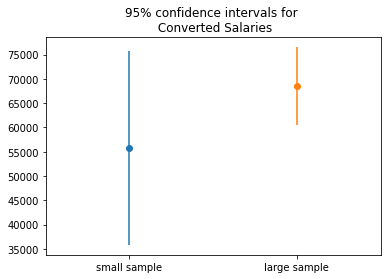

In [ ]:
# plt.errorbar
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% confidence intervals for \n Converted Salaries')
plt.xticks(ticks=[0,1], labels=['small sample', 'large sample'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

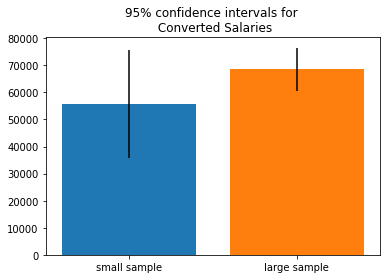

In [ ]:
#Create a plt.bar comparing both confidence intervals

plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]))
plt.bar(x=1, height=CI2[1], yerr=(CI2[2]-CI2[1]))
plt.title('95% confidence intervals for \n Converted Salaries')
plt.xticks(ticks=[0,1], labels=['small sample', 'large sample'])
plt.xlim(-.5, 1.5)
plt.show()

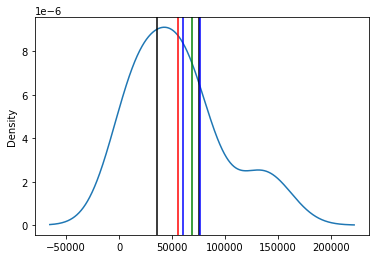

In [ ]:
#Playing around

small_sample['ConvertedSalary'].plot.density()
plt.axvline(CI1[0], color='black')
plt.axvline(CI1[1], color='red')
plt.axvline(CI1[2], color='black')

plt.axvline(CI2[0], color='blue')
plt.axvline(CI2[1], color='green')
plt.axvline(CI2[2], color='blue')

plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [ ]:
get_conf_interval(df['ConvertedSalary'])


Lower Limit:  71299.82986224785
X value:  73453.40420137631
Upper Limit:  75606.97854050477


In [ ]:
#Setup for new graph
#Create variables holding our confidence intervals
CI1 = conf_interval(small_sample['ConvertedSalary'])
CI2 = conf_interval(large_sample['ConvertedSalary'])
CI3 = conf_interval(df['ConvertedSalary'])
print(CI1)
print(CI2)
print(CI3)

(35805.10309625536, 55752.2, 75699.29690374463)
(60593.058804479086, 68551.255, 76509.45119552092)
(71299.82986224785, 73453.40420137631, 75606.97854050477)


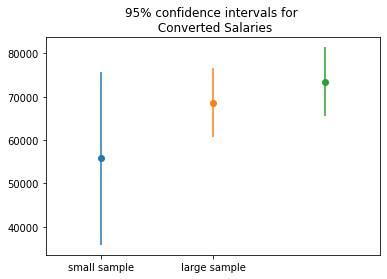

In [ ]:
# plt.errorbar
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.errorbar(x=2, y=CI3[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% confidence intervals for \n Converted Salaries')
plt.xticks(ticks=[0,1], labels=['small sample', 'large sample', 'full sample'])
plt.xlim(-.5, 2.5)
plt.show()

#### Comparing Confidence Intervals
Looking at all three confidence intervals on the above graph, it is easy to see that the smaller sample size of 20 has a large confidence interval, but the condience interval for the sample size of 200 is very close to the confidence intrval for the whole dataset.

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is the measurement of how closely grouped the results are, whereas accurace is a measurement of how close to the targe(truth) that group is located.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

A 95% confidence interval says that captures 95% of potential sample means.  It is an estimate of teh possible values of a population mean. A confidence level of 95% says that 95% of the confidence intervals calculated from the reandom samples will contain the true population mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

## 1- Study the relationship between t-tests and confidence intervals

In [ ]:
#Import the dataset used during lecture to create a sample from
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

print(df.shape)
df.head(15)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
sample = df.sample(200, random_state=20)

In [ ]:
sample.shape

(200, 15)

In [ ]:
sample.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [ ]:
get_conf_interval(sample['hours-per-week'])

Lower Limit:  39.05844349550465
X value:  40.87
Upper Limit:  42.68155650449535


###T-Tests
- Run a 1-sample t-test with the null hypothesis value being just barely outside of the confidence interval. What is the p-value?

- Run a 1-sample t-test with the null hypothesis value being just barely inside of the confidence interval. What is the p-value?



In [ ]:
get_conf_interval(sample['hours-per-week'])

Lower Limit:  39.05844349550465
X value:  40.87
Upper Limit:  42.68155650449535


In [ ]:
#Outside of the confidence interval
ttest = stats.ttest_1samp(sample['hours-per-week'], 42.69)
stat, pvalue = ttest
print('The p-value for just outside of the upper confidence interval limit is: ', pvalue)

The p-value for just outside of the upper confidence interval limit is:  0.048951851138168447


In [ ]:
#Outside of the confidence interval
ttest = stats.ttest_1samp(sample['hours-per-week'], 42.67)
stat, pvalue = ttest
print('The p-value for just outside of teh upper confidence interval limit is: ', pvalue)

The p-value for just outside of teh upper confidence interval limit is:  0.05146526687027656


###T-Tests (cont)
- What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?

It means that results outside of those boundaries are highly unlikely to be attributed to chance. 



##2- Congressional Data Set
- Go back to our congressional voting dataset and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph.

In [ ]:
#Importing the congressional dataset to use for stretch goals
# Grab the file from UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-10 21:53:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-06-10 21:53:01 (137 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [ ]:
#Create the column headers
column_headers = ['party', 'handicapped-infants', 'water-project', 'budget',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
                  'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
                  'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [ ]:
#Replace the yes and no's with 1's and 0's
df = df.replace({'y':1, 'n':0, '?':np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
#Cut the table to only show republicans
reps = df[df['party'] == 'republican']

print(reps.shape)
reps.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [ ]:
#Drop the NaNs
reps = reps.dropna()
reps.shape

(108, 16)

In [ ]:
#Drop the party column
reps = reps.drop('party', axis=1)

reps.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [ ]:
#Now work through each column creating confidence intervals on each issue
issues = ['handicapped-infants', 'water-project', 'budget',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
                  'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
                  'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 'south-africa']

for i in issues:
  lower, x_bar, upper = conf_interval(reps[i])
  print('The confidence interval for ' + i + ' are lower limit: ', lower, ' Mean: ', x_bar, ' upper limit: ', upper)

The confidence interval for handicapped-infants are lower limit:  0.13450349074958223  Mean:  0.21296296296296297  upper limit:  0.2914224351763437
The confidence interval for water-project are lower limit:  0.3765480931771919  Mean:  0.4722222222222222  upper limit:  0.5678963512672525
The confidence interval for budget are lower limit:  0.08761355698812177  Mean:  0.1574074074074074  upper limit:  0.22720125782669304
The confidence interval for physician-fee-freeze are lower limit:  0.9723853391655276  Mean:  0.9907407407407407  upper limit:  1.009096142315954
The confidence interval for el-salvador-aid are lower limit:  0.913434261310743  Mean:  0.9537037037037037  upper limit:  0.9939731460966644
The confidence interval for religious-groups are lower limit:  0.8059979340740583  Mean:  0.8703703703703703  upper limit:  0.9347428066666824
The confidence interval for anti-satellite-ban are lower limit:  0.18358393802160433  Mean:  0.26851851851851855  upper limit:  0.35345309901543276

In [ ]:
#This was an attempt to automate this but I don't think I can loop through to plot a graph.
####NOTE:  This code is not necessary for the graph

rep_conf_intervals = []

for issue in issues:
  lower, x_bar, upper = conf_interval(reps[issue])
  row = [lower, x_bar, upper]
  rep_conf_intervals.append(row)


rep_conf_intervals


[[0.13450349074958223, 0.21296296296296297, 0.2914224351763437],
 [0.3765480931771919, 0.4722222222222222, 0.5678963512672525],
 [0.08761355698812177, 0.1574074074074074, 0.22720125782669304],
 [0.9723853391655276, 0.9907407407407407, 1.009096142315954],
 [0.913434261310743, 0.9537037037037037, 0.9939731460966644],
 [0.8059979340740583, 0.8703703703703703, 0.9347428066666824],
 [0.18358393802160433, 0.26851851851851855, 0.35345309901543276],
 [0.08006715123831286, 0.14814814814814814, 0.2162291450579834],
 [0.07261245914426012, 0.1388888888888889, 0.20516531863351767],
 [0.4793093369789436, 0.5740740740740741, 0.6688388111692045],
 [0.08761355698812177, 0.1574074074074074, 0.22720125782669304],
 [0.7837708549420166, 0.8518518518518519, 0.9199328487616871],
 [0.7727987421733069, 0.8425925925925926, 0.9123864430118782],
 [0.955644609582101, 0.9814814814814815, 1.007318353380862],
 [0.050883138942941386, 0.1111111111111111, 0.17133908327928082],
 [0.5763247084144121, 0.6666666666666666, 0

In [ ]:
#Create variables holding our confidence intervals
CI1 = conf_interval(reps['handicapped-infants'])
CI2 = conf_interval(reps['water-project'])
CI3 = conf_interval(reps['budget'])
CI4 = conf_interval(reps['physician-fee-freeze'])
CI5 = conf_interval(reps['el-salvador-aid'])
CI6 = conf_interval(reps['religious-groups'])
CI7 = conf_interval(reps['anti-satellite-ban'])
CI8 = conf_interval(reps['aid-to-contras'])
CI9 = conf_interval(reps['mx-missile'])
CI10 = conf_interval(reps['immigration'])
CI11 = conf_interval(reps['synfuels'])
CI12 = conf_interval(reps['education'])
CI13 = conf_interval(reps['right-to-sue'])
CI14 = conf_interval(reps['crime'])
CI15 = conf_interval(reps['duty-free'])
CI16 = conf_interval(reps['south-africa'])

print(CI1)
print(CI2)
print(CI3)
print(CI4)
print(CI5)
print(CI6)
print(CI7)
print(CI8)
print(CI9)
print(CI10)
print(CI11)
print(CI13)
print(CI14)
print(CI15)
print(CI16)



(0.13450349074958223, 0.21296296296296297, 0.2914224351763437)
(0.3765480931771919, 0.4722222222222222, 0.5678963512672525)
(0.08761355698812177, 0.1574074074074074, 0.22720125782669304)
(0.9723853391655276, 0.9907407407407407, 1.009096142315954)
(0.913434261310743, 0.9537037037037037, 0.9939731460966644)
(0.8059979340740583, 0.8703703703703703, 0.9347428066666824)
(0.18358393802160433, 0.26851851851851855, 0.35345309901543276)
(0.08006715123831286, 0.14814814814814814, 0.2162291450579834)
(0.07261245914426012, 0.1388888888888889, 0.20516531863351767)
(0.4793093369789436, 0.5740740740740741, 0.6688388111692045)
(0.08761355698812177, 0.1574074074074074, 0.22720125782669304)
(0.7727987421733069, 0.8425925925925926, 0.9123864430118782)
(0.955644609582101, 0.9814814814814815, 1.007318353380862)
(0.050883138942941386, 0.1111111111111111, 0.17133908327928082)
(0.5763247084144121, 0.6666666666666666, 0.7570086249189212)


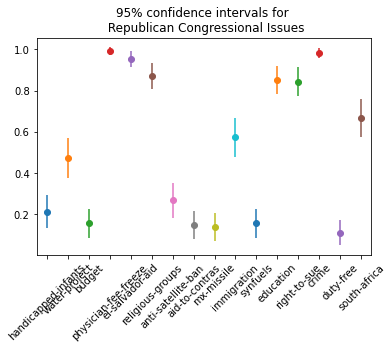

In [ ]:
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.errorbar(x=2, y=CI3[1], yerr=(CI3[2]-CI3[1]), fmt='o')
plt.errorbar(x=3, y=CI4[1], yerr=(CI4[2]-CI4[1]), fmt='o')
plt.errorbar(x=4, y=CI5[1], yerr=(CI5[2]-CI5[1]), fmt='o')
plt.errorbar(x=5, y=CI6[1], yerr=(CI6[2]-CI6[1]), fmt='o')
plt.errorbar(x=6, y=CI7[1], yerr=(CI7[2]-CI7[1]), fmt='o')
plt.errorbar(x=7, y=CI8[1], yerr=(CI8[2]-CI8[1]), fmt='o')
plt.errorbar(x=8, y=CI9[1], yerr=(CI9[2]-CI9[1]), fmt='o')
plt.errorbar(x=9, y=CI10[1], yerr=(CI10[2]-CI10[1]), fmt='o')
plt.errorbar(x=10, y=CI11[1], yerr=(CI11[2]-CI11[1]), fmt='o')
plt.errorbar(x=11, y=CI12[1], yerr=(CI12[2]-CI12[1]), fmt='o')
plt.errorbar(x=12, y=CI13[1], yerr=(CI13[2]-CI13[1]), fmt='o')
plt.errorbar(x=13, y=CI14[1], yerr=(CI14[2]-CI14[1]), fmt='o')
plt.errorbar(x=14, y=CI15[1], yerr=(CI15[2]-CI15[1]), fmt='o')
plt.errorbar(x=15, y=CI16[1], yerr=(CI16[2]-CI16[1]), fmt='o')
plt.title('95% confidence intervals for \n Republican Congressional Issues')
#plt.xticks(ticks=[0,1], labels=issues)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], labels=['handicapped-infants', 'water-project', 'budget',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
                  'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
                  'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 'south-africa'], rotation=45)
plt.xlim(-.5, 15.5)
plt.show()


#FIN
